In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression


In [50]:
data = load_breast_cancer()
X, y = data.data, data.target

print(f"Shape of input data (X): {X.shape}")
print(f"Shape of labels (y): {y.shape}")
print(f"\nFeature Names: {data.feature_names[:5]}")
print(f"Class Names: {data.target_names}")


Shape of input data (X): (569, 30)
Shape of labels (y): (569,)

Feature Names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness']
Class Names: ['malignant' 'benign']


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [53]:
model_sklearn = LogisticRegression(random_state=42)

model_sklearn.fit(X_train_scaled, y_train)

y_pred_sklearn = model_sklearn.predict(X_test_scaled)

accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
print("--- Results from Scikit-learn Model ---")
print(f"Accuracy: {accuracy_sklearn:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_sklearn, target_names=data.target_names))

--- Results from Scikit-learn Model ---
Accuracy: 0.9737

Classification Report:
              precision    recall  f1-score   support

   malignant       0.98      0.95      0.96        43
      benign       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114





## Mathematical Foundations of the Implementation

This document breaks down the core mathematical formulas used to implement Logistic Regression with Gradient Descent from scratch.

### 1. The Hypothesis - Sigmoid Function

In logistic regression, our hypothesis, $h_{\theta}(x)$, represents the predicted probability that the output `y` is 1 for a given input `x`. Since probabilities must be between 0 and 1, we cannot use a simple linear function. Instead, we use the **Sigmoid (or Logistic) Function**, which squashes any real-valued number into the range (0, 1).

First, we calculate a linear combination of the input features and the parameters, which we call `z`:

> $z = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n$

In vectorized form, where $\theta$ is the parameter vector and $X$ is the feature matrix (with an added column of ones for the intercept), this is written as:

> $z = X \theta$

Next, we pass this value `z` through the sigmoid function, denoted by $\sigma(z)$:

> $h_{\theta}(X) = \sigma(z) = \frac{1}{1 + e^{-z}}$

The output, $h_{\theta}(X)$, is a vector of predicted probabilities for the positive class (y=1).

### 2. The Cost Function - Log Loss

To measure how well our model is performing, we need a cost function. For logistic regression, we use the **Log Loss** (also known as Binary Cross-Entropy). This function is convex, ensuring that Gradient Descent can find the global minimum.

The cost for a single training example is:
> $Cost(h_{\theta}(x), y) = -y \log(h_{\theta}(x)) - (1-y) \log(1 - h_{\theta}(x))$

This formula heavily penalizes the model for predictions that are confident but wrong. To get the total cost over all `m` training examples, we average the cost for each example. This gives us the final cost function, $J(\theta)$:

> $J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [y^{(i)} \log(h_{\theta}(x^{(i)})) + (1-y^{(i)}) \log(1 - h_{\theta}(x^{(i)}))]$

Our goal is to find the values of `theta` that minimize this function $J(\theta)$.

### 3. The Gradient of the Cost Function

To minimize the cost function using Gradient Descent, we need to know which direction to move our `theta` values. This direction is given by the **gradient**, which is the vector of partial derivatives of the cost function with respect to each parameter $\theta_j$.

The partial derivative of $J(\theta)$ with respect to a single parameter $\theta_j$ is:

> $\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$

To make our implementation efficient, we use the vectorized form, which calculates the gradient for all parameters at once:

> $\nabla J(\theta) = \frac{1}{m} X^T (h_{\theta}(X) - y)$

Here:
- $\nabla J(\theta)$ is the gradient vector.
- $X^T$ is the transpose of the feature matrix.
- $(h_{\theta}(X) - y)$ is the vector of prediction errors.

### 4. The Gradient Descent Update Rule

Finally, the Gradient Descent algorithm uses the gradient to iteratively update the parameters `theta` in the opposite direction of the steepest ascent, thus minimizing the cost.

The update rule is applied simultaneously to all parameters in each iteration:

> $\theta := \theta - \alpha \nabla J(\theta)$

In this rule:
- `θ` is the vector of our model's parameters.
- `α` (alpha) is the **learning rate**, a hyperparameter that controls how large of a step we take in each iteration.
- `∇J(θ)` is the gradient vector we calculated in the previous step.

This process is repeated for a set number of iterations, gradually adjusting `theta` until the cost function $J(\theta)$ is minimized.

In [54]:
def sigmoid(z):
    """Sigmoid function"""
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    epsilon = 1e-5 
    cost = (-1 / m) * np.sum(y * np.log(h + epsilon) + (1 - y) * np.log(1 - h + epsilon))
    return cost
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        h = sigmoid(X @ theta)
        gradient = (1 / m) * (X.T @ (h - y))
        theta = theta - alpha * gradient
        cost_history[i] = compute_cost(X, y, theta)
        
    return theta, cost_history

In [55]:
X_train_b = np.c_[np.ones((len(X_train_scaled), 1)), X_train_scaled]
X_test_b = np.c_[np.ones((len(X_test_scaled), 1)), X_test_scaled]

y_train_reshaped = y_train.reshape(-1, 1)

In [56]:
alpha = 0.01     
iterations = 2000
n_features = X_train_b.shape[1]

theta_initial = np.zeros((n_features, 1))

theta_final, cost_history = gradient_descent(X_train_b, y_train_reshaped, theta_initial, alpha, iterations)

print("\n--- Results from Gradient Descent Model (from Scratch) ---")
print(f"Final parameters (theta) have been found.")


--- Results from Gradient Descent Model (from Scratch) ---
Final parameters (theta) have been found.


In [57]:
y_pred_scratch_prob = sigmoid(X_test_b @ theta_final)
y_pred_scratch = (y_pred_scratch_prob >= 0.5).astype(int).flatten()

accuracy_scratch = accuracy_score(y_test, y_pred_scratch)
print(f"Accuracy: {accuracy_scratch:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_scratch, target_names=data.target_names))

Accuracy: 0.9912

Classification Report:
              precision    recall  f1-score   support

   malignant       1.00      0.98      0.99        43
      benign       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114




--- Final Comparison ---
Scikit-learn Model Accuracy: 0.9737
From-Scratch Model Accuracy: 0.9912


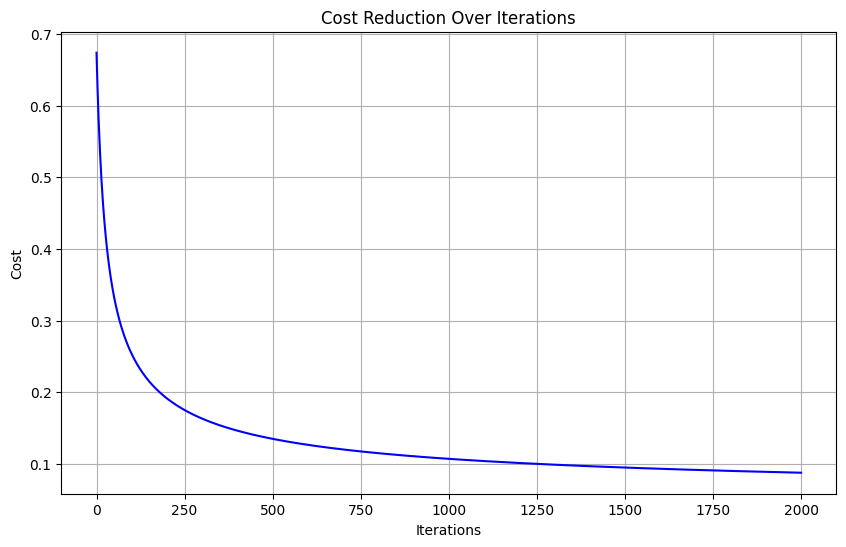

In [58]:
print("\n--- Final Comparison ---")
print(f"Scikit-learn Model Accuracy: {accuracy_sklearn:.4f}")
print(f"From-Scratch Model Accuracy: {accuracy_scratch:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(range(iterations), cost_history, 'b-')
plt.title("Cost Reduction Over Iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.grid(True)
plt.show()